In [1]:
import scipy.io as sio
import urllib.request
import os.path as op
import matplotlib.pyplot as plt
import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

/Users/arokem/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
t1 = time.time()

if not op.exists('fashion.mat'):
    urllib.request.urlretrieve("https://s3.amazonaws.com/assets.datacamp.com/production/course_6052/datasets/fashion.mat", "fashion.mat")

#_mat = sio.loadmat('/usr/local/share/datasets/fashion.mat')
_mat = sio.loadmat('./fashion.mat')

x_train = _mat['x_train']
x_test = _mat['x_test']
x_valid = _mat['x_valid']
y_train = _mat['y_train']
y_test = _mat['y_test']
y_valid = _mat['y_valid']

img_rows = 28
img_cols = 28
batch_size = 10
epochs = 4
num_classes = 3
input_shape = (img_rows, img_cols, 1)

In [3]:
#x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
#x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)

In [15]:
# Create the model: model
model = Sequential()

# Add a convolutional layer:
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

model.add(Flatten())

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
#training = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs)


training = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_valid, y_valid))


ValueError: Error when checking target: expected dense_6 to have 4 dimensions, but got array with shape (500, 3)

In [12]:


score = model.evaluate(x_test, y_test, verbose=0)

In [13]:
print(score)

[0.2754067263007164, 0.94]


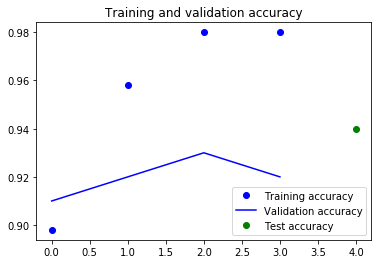

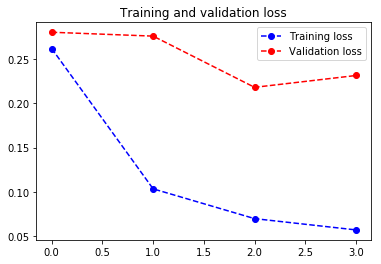

This took 196.13292980194092 seconds


In [14]:
accuracy = training.history['acc']
val_accuracy = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs[-1] + 1, score[-1], 'go', label='Test accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo--', label='Training loss')
plt.plot(epochs, val_loss, 'ro--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print("This took %s seconds" % (time.time() - t1) )